In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
loans = pd.read_csv('/content/drive/MyDrive/Datasets/loans_modified.csv')

In [ ]:
loans.head().T

,0,1,2,3,4
loan_id,LP001003,LP001005,LP001006,LP001008,LP001011
gender,Male,Male,Male,Male,Male
married,Yes,Yes,Yes,No,Yes
dependents,1,0,0,0,2
education,Graduate,Graduate,Not Graduate,Graduate,Graduate
self_employed,No,NaN,No,No,Yes
applicant_income,4583.0,3000.0,2583.0,6000.0,5417.0
coapplicant_income,1508.0,0.0,2358.0,0.0,4196.0
loan_amount,128.0,66.0,120.0,141.0,267.0
loan_amount_term,360.0,360.0,360.0,360.0,360.0


In [ ]:
"""
Select
  *
FROM loans
WHERE (loan_id is NOT NULL AND gender is NULL) OR (loan_id is NULL AND gender is NOT NULL)
"""

In [ ]:
"""
Select
distinct(*)
FROM loans
"""

In [ ]:
loans2 = loans.drop(['loan_id'], axis=1)

In [ ]:
loans2

,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,0.0
1,Male,Yes,0,Graduate,NaN,3000.0,0.0,66.0,360.0,1.0,Urban,1.0
2,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,1.0
3,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,1.0
4,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
558,Male,Yes,1,Graduate,No,2491.0,2054.0,104.0,360.0,1.0,Semiurban,NaN
559,NaN,Yes,0,Graduate,No,2483.0,2466.0,90.0,180.0,0.0,Rural,1.0
560,Male,Yes,1,Graduate,No,1625.0,1803.0,96.0,360.0,1.0,Urban,1.0
561,Male,Yes,1,Graduate,No,NaN,1843.0,123.0,NaN,1.0,Semiurban,1.0


In [ ]:
loans2 = pd.get_dummies(loans2)

In [ ]:
loans2.head(5)

,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,loan_status,gender_Female,gender_Male,married_No,married_Yes,...,dependents_1,dependents_2,dependents_3+,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,4583.0,1508.0,128.0,360.0,1.0,0.0,False,True,False,True,...,True,False,False,True,False,True,False,True,False,False
1,3000.0,0.0,66.0,360.0,1.0,1.0,False,True,False,True,...,False,False,False,True,False,False,False,False,False,True
2,2583.0,2358.0,120.0,360.0,1.0,1.0,False,True,False,True,...,False,False,False,False,True,True,False,False,False,True
3,6000.0,0.0,141.0,360.0,1.0,1.0,False,True,True,False,...,False,False,False,True,False,True,False,False,False,True
4,5417.0,4196.0,267.0,360.0,1.0,1.0,False,True,False,True,...,False,True,False,True,False,False,True,False,False,True


In [ ]:
corr_mat = loans2.corr()

<Axes: >

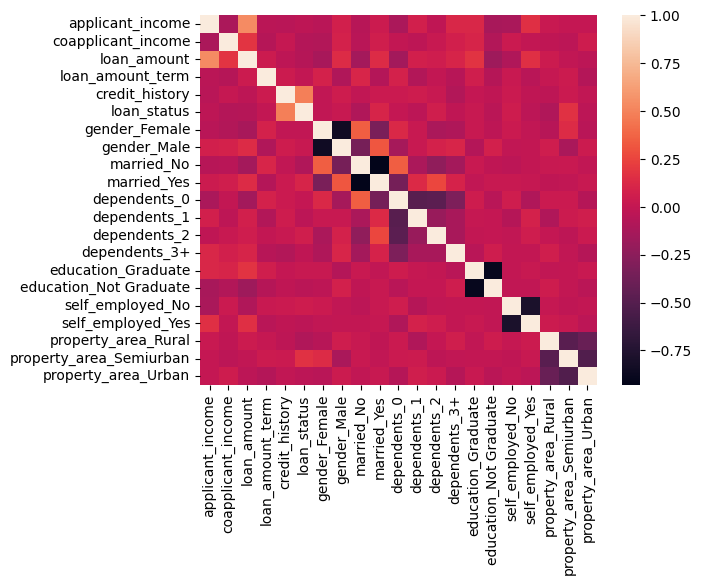

In [ ]:
sns.heatmap(data=corr_mat)

In [ ]:
loans2.head(2)

,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,loan_status,gender_Female,gender_Male,married_No,married_Yes,...,dependents_1,dependents_2,dependents_3+,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,4583.0,1508.0,128.0,360.0,1.0,0.0,False,True,False,True,...,True,False,False,True,False,True,False,True,False,False
1,3000.0,0.0,66.0,360.0,1.0,1.0,False,True,False,True,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
loans2.dropna(inplace=True)

In [ ]:
loans2.drop_duplicates(inplace=True)

In [ ]:
loans2.shape

(398, 21)

In [ ]:
loans2.isnull().sum()

,0
applicant_income,0
coapplicant_income,0
loan_amount,0
loan_amount_term,0
credit_history,0
loan_status,0
gender_Female,0
gender_Male,0
married_No,0
married_Yes,0


In [ ]:
X = loans2.drop(['loan_status'], axis=1).copy()
y = loans2['loan_status']

In [ ]:
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=.3, random_state=42)

In [ ]:
de_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
de_tree.fit(X_Train, y_Train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
y_pred = de_tree.predict(X_Test)

In [ ]:
acc = de_tree.score(X_Test, y_Test)

print(f'Accuracy: {acc}')

Accuracy: 0.7083333333333334


In [ ]:
conmax = confusion_matrix(y_Test, y_pred)

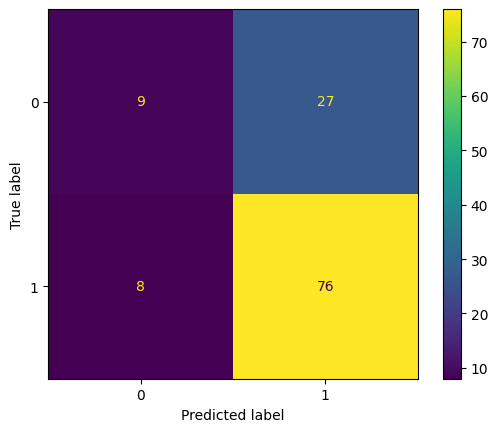

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=conmax, ).plot()
